In [54]:
%matplotlib inline

In [55]:
from kid_readout.measurement import core
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-05-16_125204_sweep.nc')

In [5]:
print(ncf.metadata.script)

import time

import numpy as np
try:
    from tqdm import tqdm
    make_iterable = tqdm
except ImportError:
    make_iterable = list

from kid_readout.roach import hardware_tools
from kid_readout.measurement.acquire import acquire
from kid_readout.measurement.io import helpers
from kid_readout.settings import CRYOSTAT

# Parameters
f0_MHz = np.array([2201.8, 2378.8, 2548.9, 2731.5, 2905.1, 3416.0])
num_offsets = 100
span_MHz = 20
minimum_MHz = 10
round_to_MHz = 2
lo_MHz = round_to_MHz * np.round((f0_MHz - span_MHz / 2 - minimum_MHz) / round_to_MHz)
offsets_MHz = np.linspace(minimum_MHz, minimum_MHz + span_MHz, num_offsets)
num_tone_samples = 2**19
length_seconds = 0.1
# Hardware
ri = hardware_tools.r2_with_mk2()
ri.set_dac_atten(40)
ri.set_fft_gain(4)
ri.set_modulation_output('high')

# State
state = {'cryostat': CRYOSTAT,
         'canceling_magnet': {'orientation': 'up',
                              'distance_from_base_mm': 25}}

# Run
ncf = helpers.new_nc_file(suffix='sweep')
tic =

In [4]:
sas = [ncf.read(name) for name in ncf.measurement_names()]

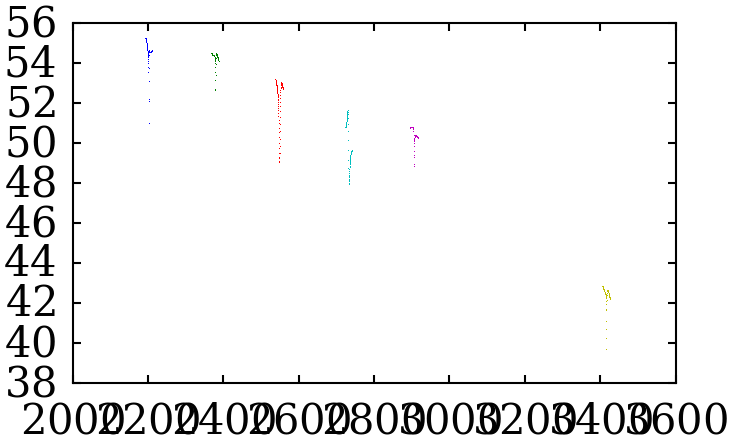

In [6]:
fig, ax = plt.subplots()
for sa in sas:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',')

In [15]:
sas[0].num_channels

1

In [28]:
ss0 = sas[0][0]

In [29]:
type(ss0.resonator)

kid_readout.analysis.resonator.lmfit_resonator.LinearResonatorWithCable

In [56]:
def amplitude(single_sweep, num_points=1e3, f_scale=1e-9):
    model_f = np.linspace(single_sweep.resonator.frequency.min(), single_sweep.resonator.frequency.max(), num_points)
    model_s21 = single_sweep.resonator.model.eval(params=single_sweep.resonator.current_params, f=model_f)
    fig, ax = plt.subplots()
    ax.plot(f_scale * single_sweep.resonator.frequency,
            20 * np.log10(np.abs(single_sweep.resonator.data / single_sweep.resonator.A_mag)),
            '.')
    ax.plot(f_scale * model_f,
            20 * np.log10(np.abs(model_s21 / single_sweep.resonator.A_mag)),
            '-r')
    return fig, ax

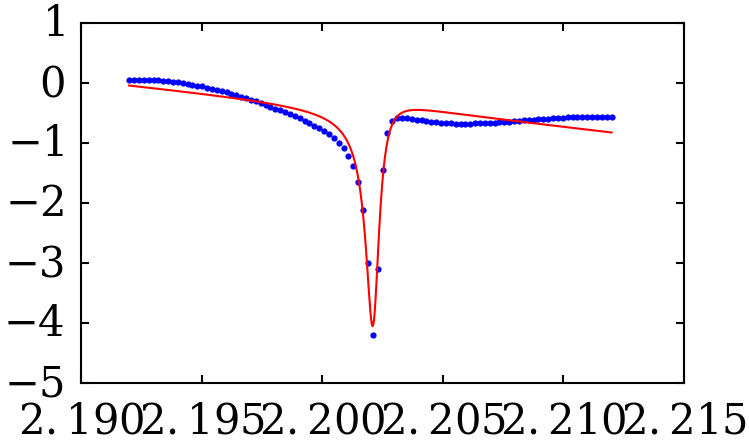

In [57]:
fig, ax = amplitude(ss0)

In [58]:
ss0.resonator.f_0

2202161709.5388823

In [46]:
ss0.resonator.Q_i

3990.4726312418002

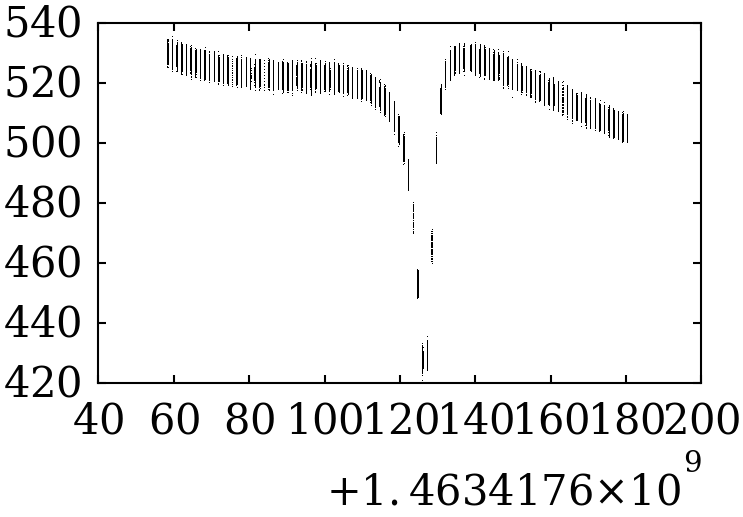

In [47]:
fig, ax = plt.subplots()
for s in sas[1].stream_arrays:
    ax.plot(s.epoch + s.sample_time, np.abs(s[0].s21_raw), ',k')

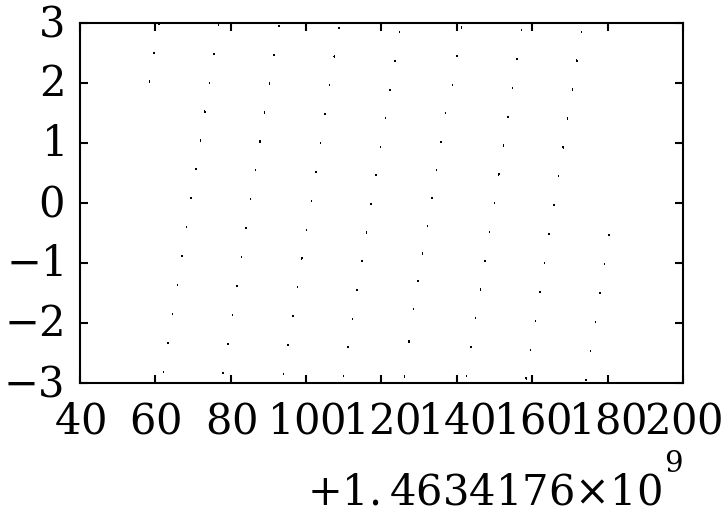

In [48]:
fig, ax = plt.subplots()
for s in sas[1].stream_arrays:
    ax.plot(s.epoch + s.sample_time, np.angle(s[0].s21_raw), ',k')

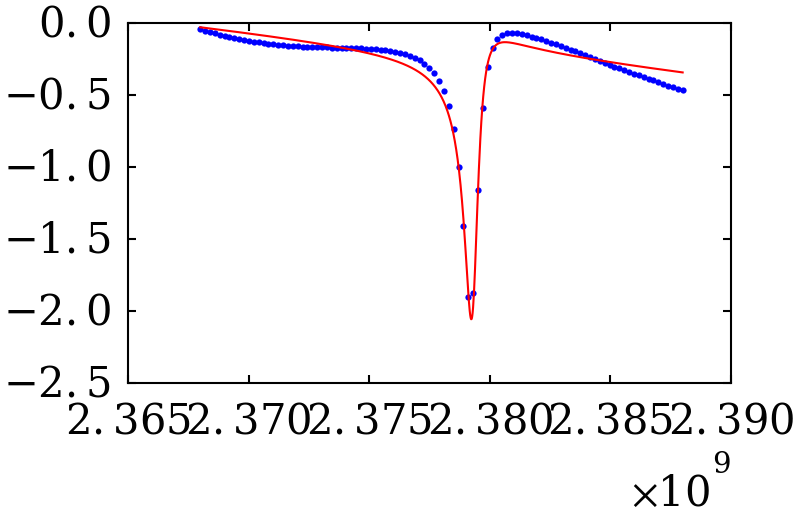

In [49]:
fig, ax = amplitude(sas[1][0])

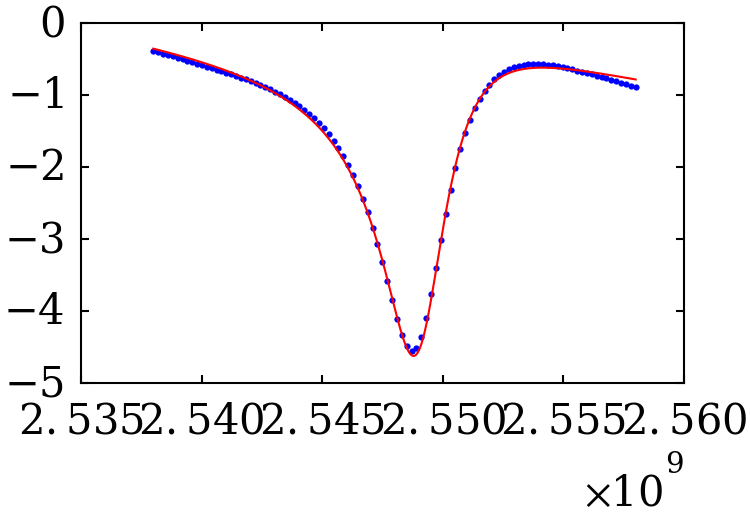

In [50]:
fig, ax = amplitude(sas[2][0])

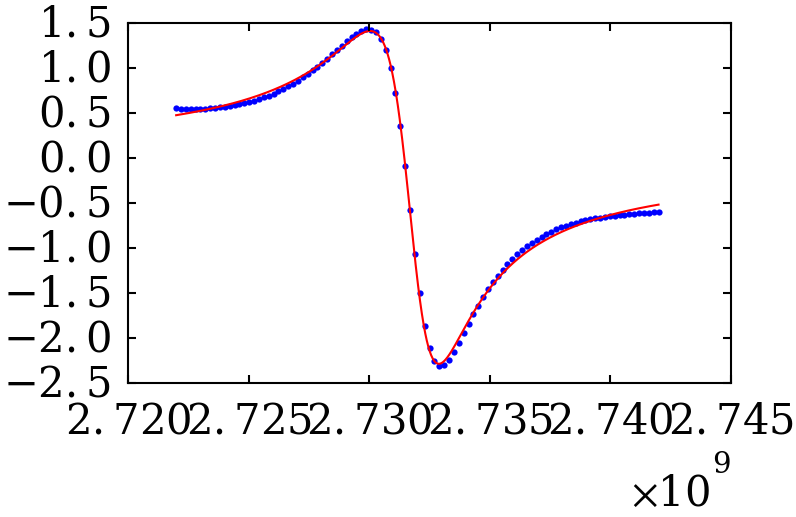

In [51]:
fig, ax = amplitude(sas[3][0])

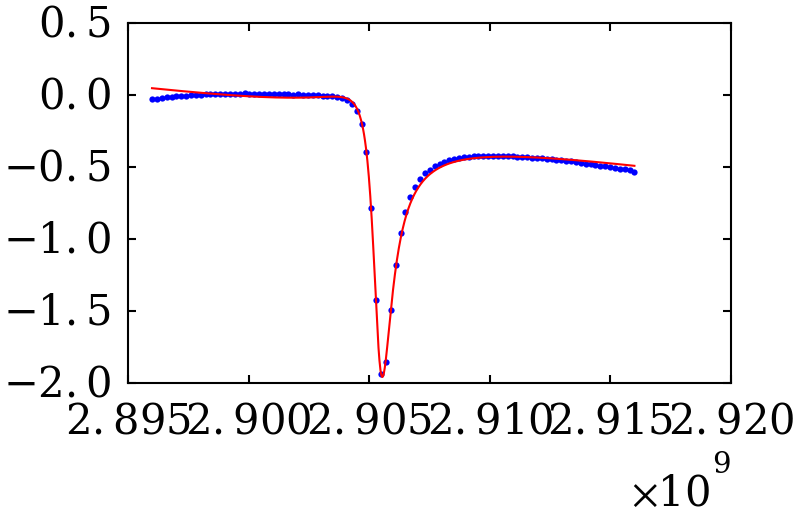

In [52]:
fig, ax = amplitude(sas[4][0])

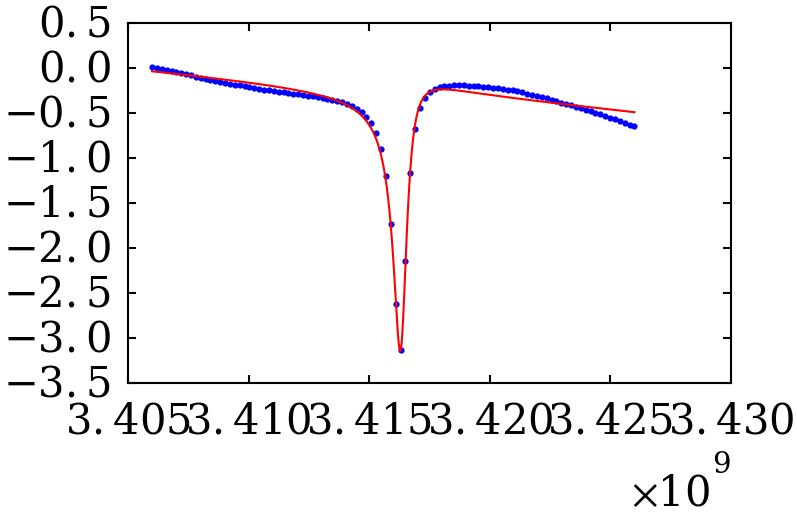

In [53]:
fig, ax = amplitude(sas[5][0])